<a href="https://colab.research.google.com/github/hazrakeruboO/DS-Colabs/blob/main/Copy_of_Python_Programming_The_K_Nearest_Neighbours_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: The K-Nearest Neighbours (KNN)

## Examples

### Example 1: Classification

In [1]:
# Example 
# ---
# Question: Predict the class to which these plants belong. 
# There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 
# ---
# Dataset url = http://bit.ly/DatasetIris
# ---
# 
#dataset=pd.read_csv('http://bit.ly/DatasetIris')
#dataset.head()

In [67]:
# Importing our libraries
# ---
# 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Loading our dataset
# ---
# 

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv("http://bit.ly/DatasetIris", names = names)

In [4]:
# Previewing our datset
# ---
# 
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [8]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [12]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [13]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0  7  2]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.92        30
   weighted avg       0.95      0.93      0.93        30



### Example 2: Regression

In [14]:
# Example 2
# ---
# Question: Predict the age of a voter through the use of other variables in the dataset.
# ---
# 
#OUR CODE GOES HERE

In [15]:
# First installing pydataset
# ---
!pip install pydataset 

In [16]:
# Then loading our libraries
# 
from pydataset import data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [17]:
# Previewing our turnout dataset
# ---
# 
df = data("turnout")
df.head()

,race,age,educate,income,vote
1,white,60,14.0,3.3458,1
2,white,51,10.0,1.8561,0
3,white,24,12.0,0.6304,0
4,white,38,8.0,3.4183,1
5,white,25,12.0,2.7852,1


In [18]:
# Determining the size of the dataset
# 
df.shape

(2000, 5)

In [19]:
df.duplicated().sum()

35

In [20]:
df.isnull().sum()

race       0
age        0
educate    0
income     0
vote       0
dtype: int64

In [21]:
# Splitting our data
# ---
# 
X = df[['age','income','vote']]
y = df['educate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [22]:
# Training our algorithm
# ---
# 
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [23]:
# Making our prediction
# ---
# 
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

9.24720385674931


## <font color="green">Challenge 1</font>

In [24]:
# Challenge 1
# ---
# Question: Predict the income level based on the individual’s personal information in the given dataset.
# ---
# Dataset url = http://bit.ly/DatasetAdult
# ---
# 
income=pd.read_csv('http://bit.ly/DatasetAdult')
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
# replacing the ? values with nan
income.replace('?', np.nan, inplace= True)

In [26]:
income.shape

(48842, 15)

In [27]:
income.duplicated().sum()

52

In [28]:
income.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [29]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [30]:
for col in income.columns:
  pct_missing = np.mean(income[col].isnull())
  print('{}-{}%'.format(col,round(pct_missing*100)))

age-0%
workclass-6%
fnlwgt-0%
education-0%
educational-num-0%
marital-status-0%
occupation-6%
relationship-0%
race-0%
gender-0%
capital-gain-0%
capital-loss-0%
hours-per-week-0%
native-country-2%
income-0%


In [31]:
# label encoding categorical columns 
categorical_columns = [ 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'native-country','hours-per-week']



# encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# instantiate label encoder object
le = LabelEncoder()

# apply le on categorical columns
income[categorical_columns] = income[categorical_columns].apply(lambda col:le.fit_transform(col))

In [32]:
numerical_columns=['age','capital-gain', 'capital-loss',]

In [33]:
#dealing with missing values
new_columns=['workclass','occupation','native-country']
for column in new_columns:
  income[column].fillna(income[column].mode(),inplace=True)

 


In [34]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
#dealing with null valuqes in work class,occupation and native country
income['occupation'] = (income['occupation'].fillna(['occupation'].mode()))

income['workclass']=(income['workclass'].fillna(['workclass'].mode()))

In [ ]:
#X = income[['age','workclass','fnlwgt','education','educational-num','marital-status',
          #  'occupation','relationship','race','gender','capital-gain','capital-loss'
          #  'hours-per-week','native-country']]
#y = income['income']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

## <font color="green">Challenge 2</font>

In [37]:
# Challenge 2
# ---
# Question: Using KNN, predict if the client will subscribe a term deposit (variable y).
# ---
# Dataset url = http://bit.ly/DatasetBank
# ---
# Dasest info = http://bit.ly/DatasetBankInfo
# ---
# 
banking=pd.read_csv('http://bit.ly/DatasetBank',delimiter=';')
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
banking.tail()

In [ ]:
banking.shape

In [68]:
#checking the data types
banking.dtypes

age                float64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration          category
campaign           float64
pdays              float64
previous           float64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

Data**Preparation**

In [69]:
banking.isnull().values.any()

False

In [70]:
# replacing the ? values with nan
banking.replace('unknown', np.nan, inplace= True)

In [71]:
banking.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [38]:
for col in banking.columns:
  pct_missing = np.mean(banking[col].isnull())
  print('{}-{}%'.format(col,round(pct_missing*100)))

age-0%
job-0%
marital-0%
education-0%
default-0%
housing-0%
loan-0%
contact-0%
month-0%
day_of_week-0%
duration-0%
campaign-0%
pdays-0%
previous-0%
poutcome-0%
emp.var.rate-0%
cons.price.idx-0%
cons.conf.idx-0%
euribor3m-0%
nr.employed-0%
y-0%


In [39]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [40]:
# 330 values are missing in job column
banking['job'].isna().sum()

0

In [41]:
# we fill that with mode
banking['job'] = banking['job'].fillna((banking['job'].mode()[0]))

In [42]:
banking['job'].isnull().sum()

0

In [43]:
# 330 values are missing in educatio column
banking['education'].isna().sum()# we have 1731 columns with missing values

0

In [44]:
# we fill that with mode
#data['Native Country'].fillna(data['Native Country'].mode()[0], inplace=True)
banking['education'] = banking['education'].fillna((banking['education'].mode()[0]))

In [45]:
banking['education'].isna().sum()

0

In [46]:
# 8597 values are missing in job column
banking['default'] = banking['default'].fillna((banking['default'].mode()[0]))

In [47]:
banking['default'].isna().sum()

0

In [48]:
# 990 housing records are missing will fill with mode
banking['housing'] = banking['housing'].fillna((banking['housing'].mode()[0]))

In [49]:
banking['housing'].isna().sum()# filled null values with mode

0

In [50]:
# 990 housing records are missing will fill with mode
banking['loan'] = banking['loan'].fillna((banking['loan'].mode()[0]))

In [51]:
# 990 housing records are missing will fill with mode
banking['marital'] = banking['marital'].fillna((banking['marital'].mode()[0]))

In [52]:
banking.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [53]:
banking.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [54]:
# label encoding categorical columns 
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration',
        'poutcome', 'y']
  


# encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# instantiate label encoder object
le = LabelEncoder()

# apply le on categorical columns
banking[categorical_columns] = banking[categorical_columns].apply(lambda col:le.fit_transform(col))

In [55]:
# previewing the firdt 5 rows
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [56]:
# using a for loop to convert all the columns 
for column in categorical_columns:
  banking[categorical_columns] = banking[categorical_columns].astype('category')

In [57]:
# converting all numerical columns to float datatypes
numerical_columns = ['age','campaign','pdays','previous']

# using a for loop to convert all the columns 
for column in numerical_columns:
  banking[column] = banking[column].astype('float')

In [58]:
banking.dtypes

age                float64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration          category
campaign           float64
pdays              float64
previous           float64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

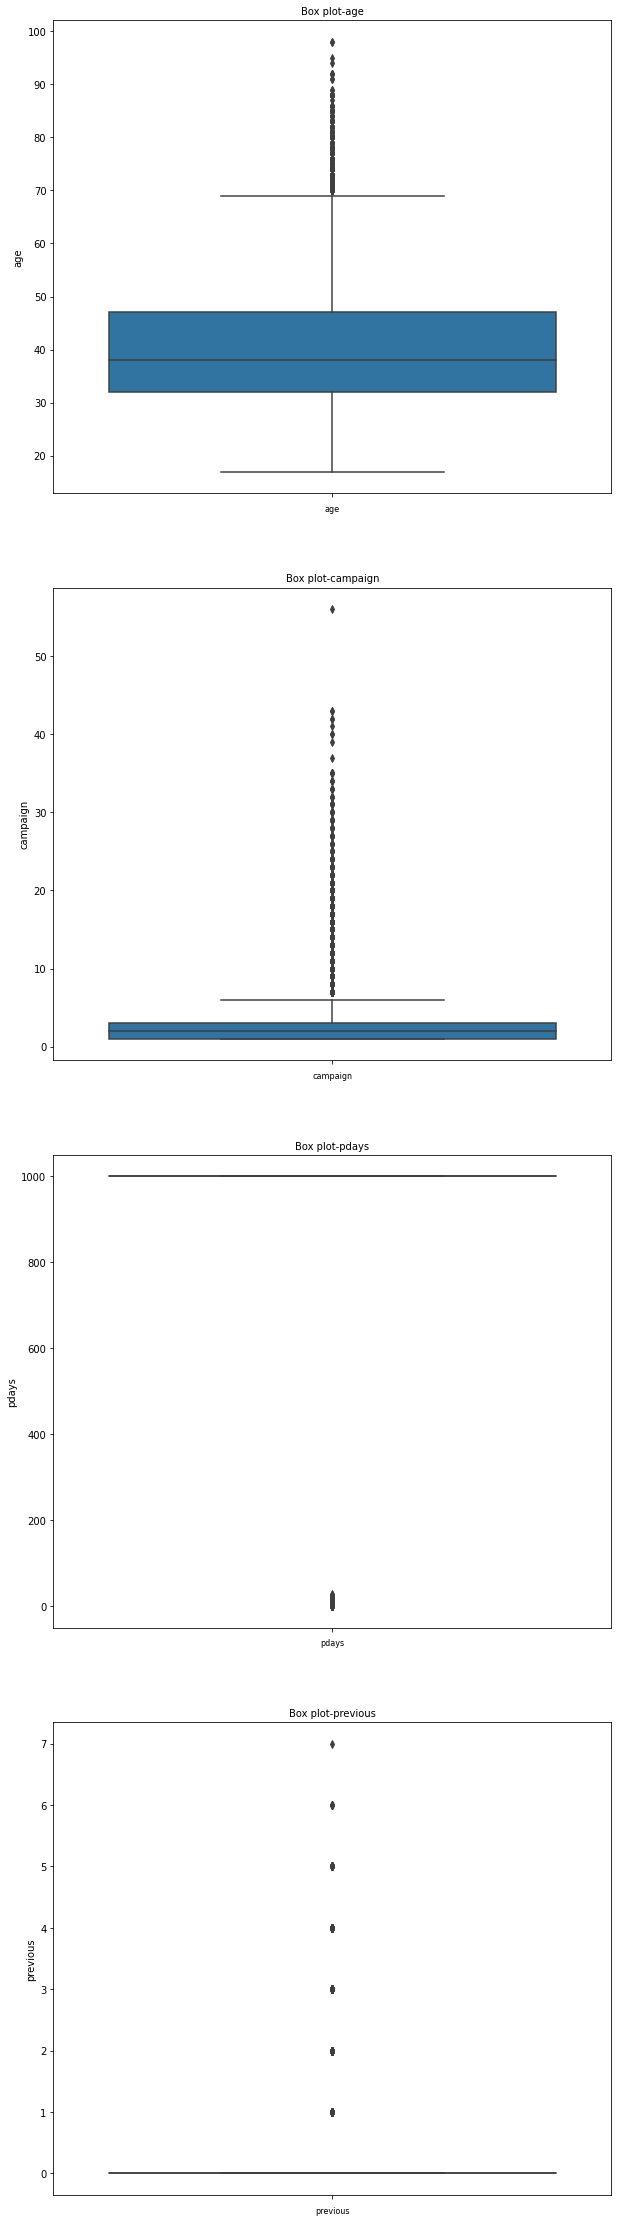

In [72]:
columns = ['age','campaign','pdays','previous']

fig, ax = plt.subplots(len(columns), figsize = (10, 40))

for i, col_val in enumerate(columns):

  sns.boxplot(y= banking[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [73]:
import pandas_profiling as pp

from pandas_profiling import ProfileReport
ProfileReport(banking title = "Banking data report"))

SyntaxError: ignored

Univariate **Analysis**

In [61]:
# statistical summary
banking.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [62]:
for column in columns:
  print(column +':' + str(banking[column].median()))

age:38.0
campaign:2.0
pdays:999.0
previous:0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

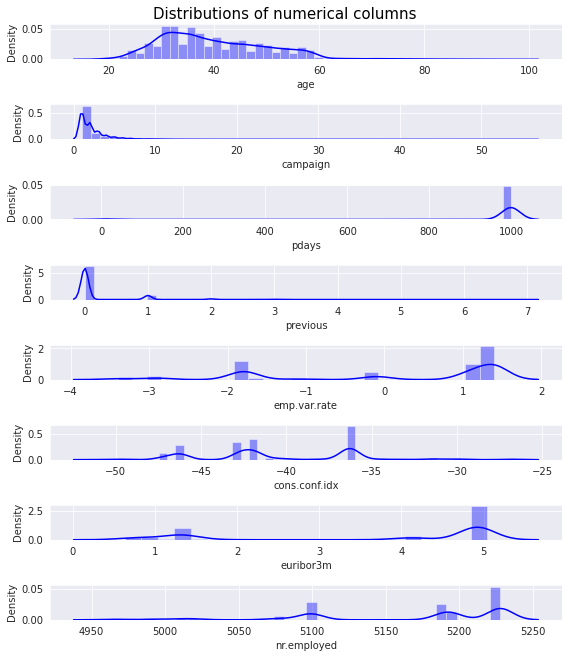

In [74]:
columns = ['age','campaign','pdays','previous','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (8, 9))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), banking, columns):
  sns.distplot(banking[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()

***Plotting Bivariate ***
Checking how cat columns relate to the y (target)column


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes.

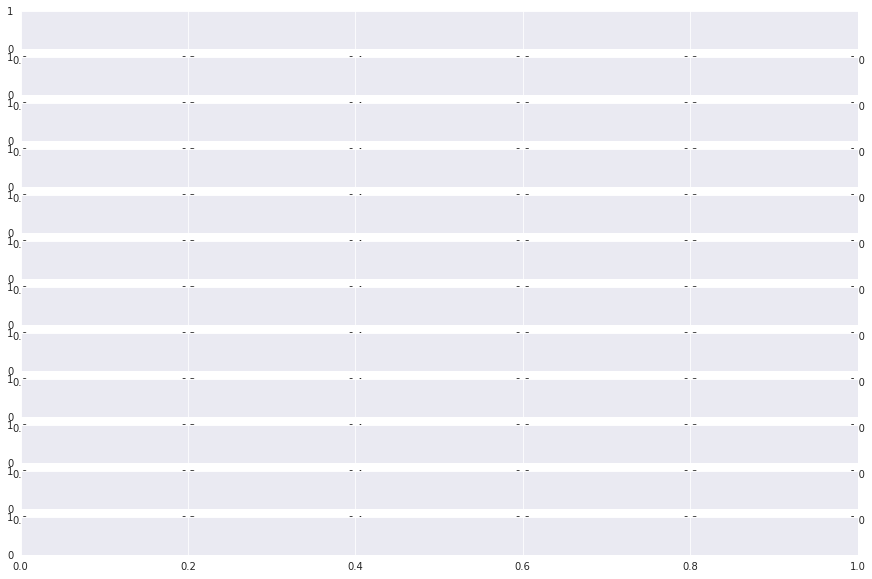

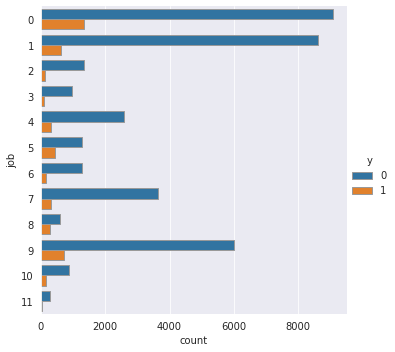

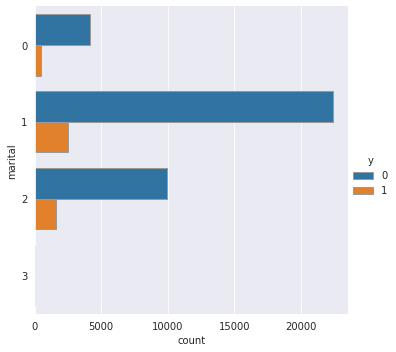

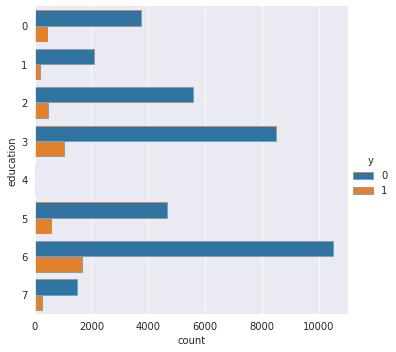

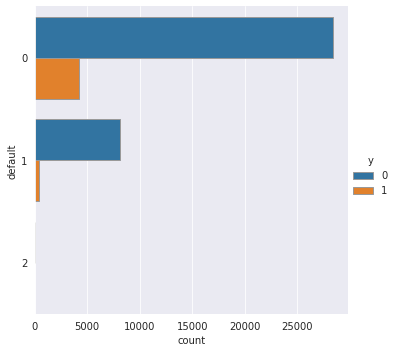

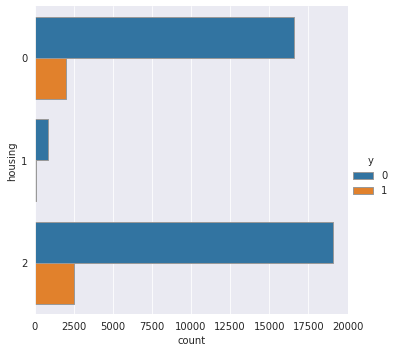

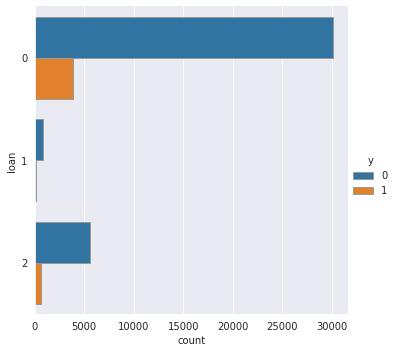

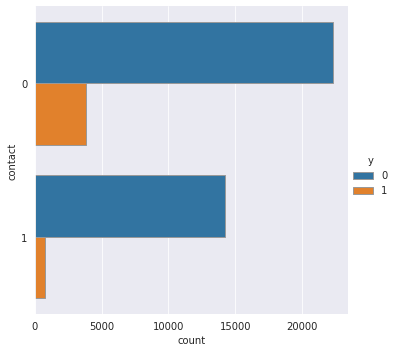

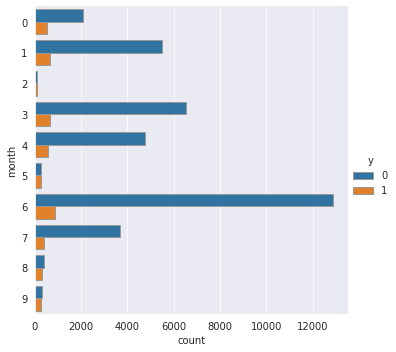

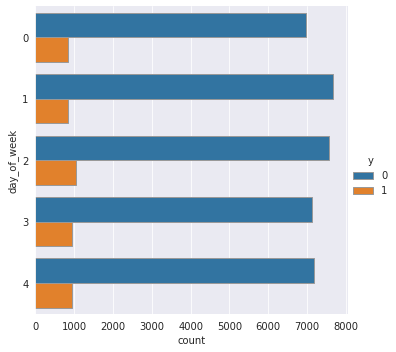

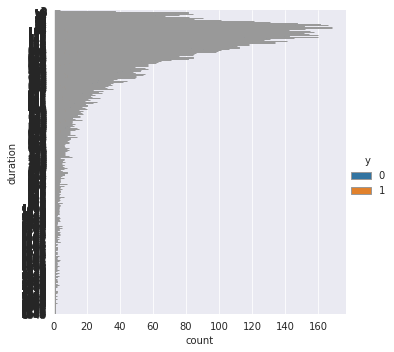

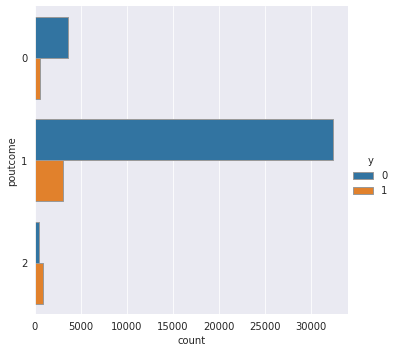

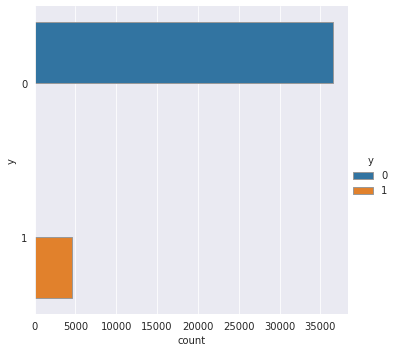

In [75]:
# plotting cat plots
sns.set_style('darkgrid')

fig, axes = plt.subplots(len(categorical_columns), figsize=(15, 10))
# we will set the hue to be the status column as this is our target variable
for var, subplot in zip(categorical_columns, axes.flatten()):
  sns.catplot(y=var, kind="count", hue="y", edgecolor=".6", data=banking, ax=subplot);


In [76]:
# y vs numerical variables
numerical_df = banking.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration',
        'poutcome'],axis = 1)

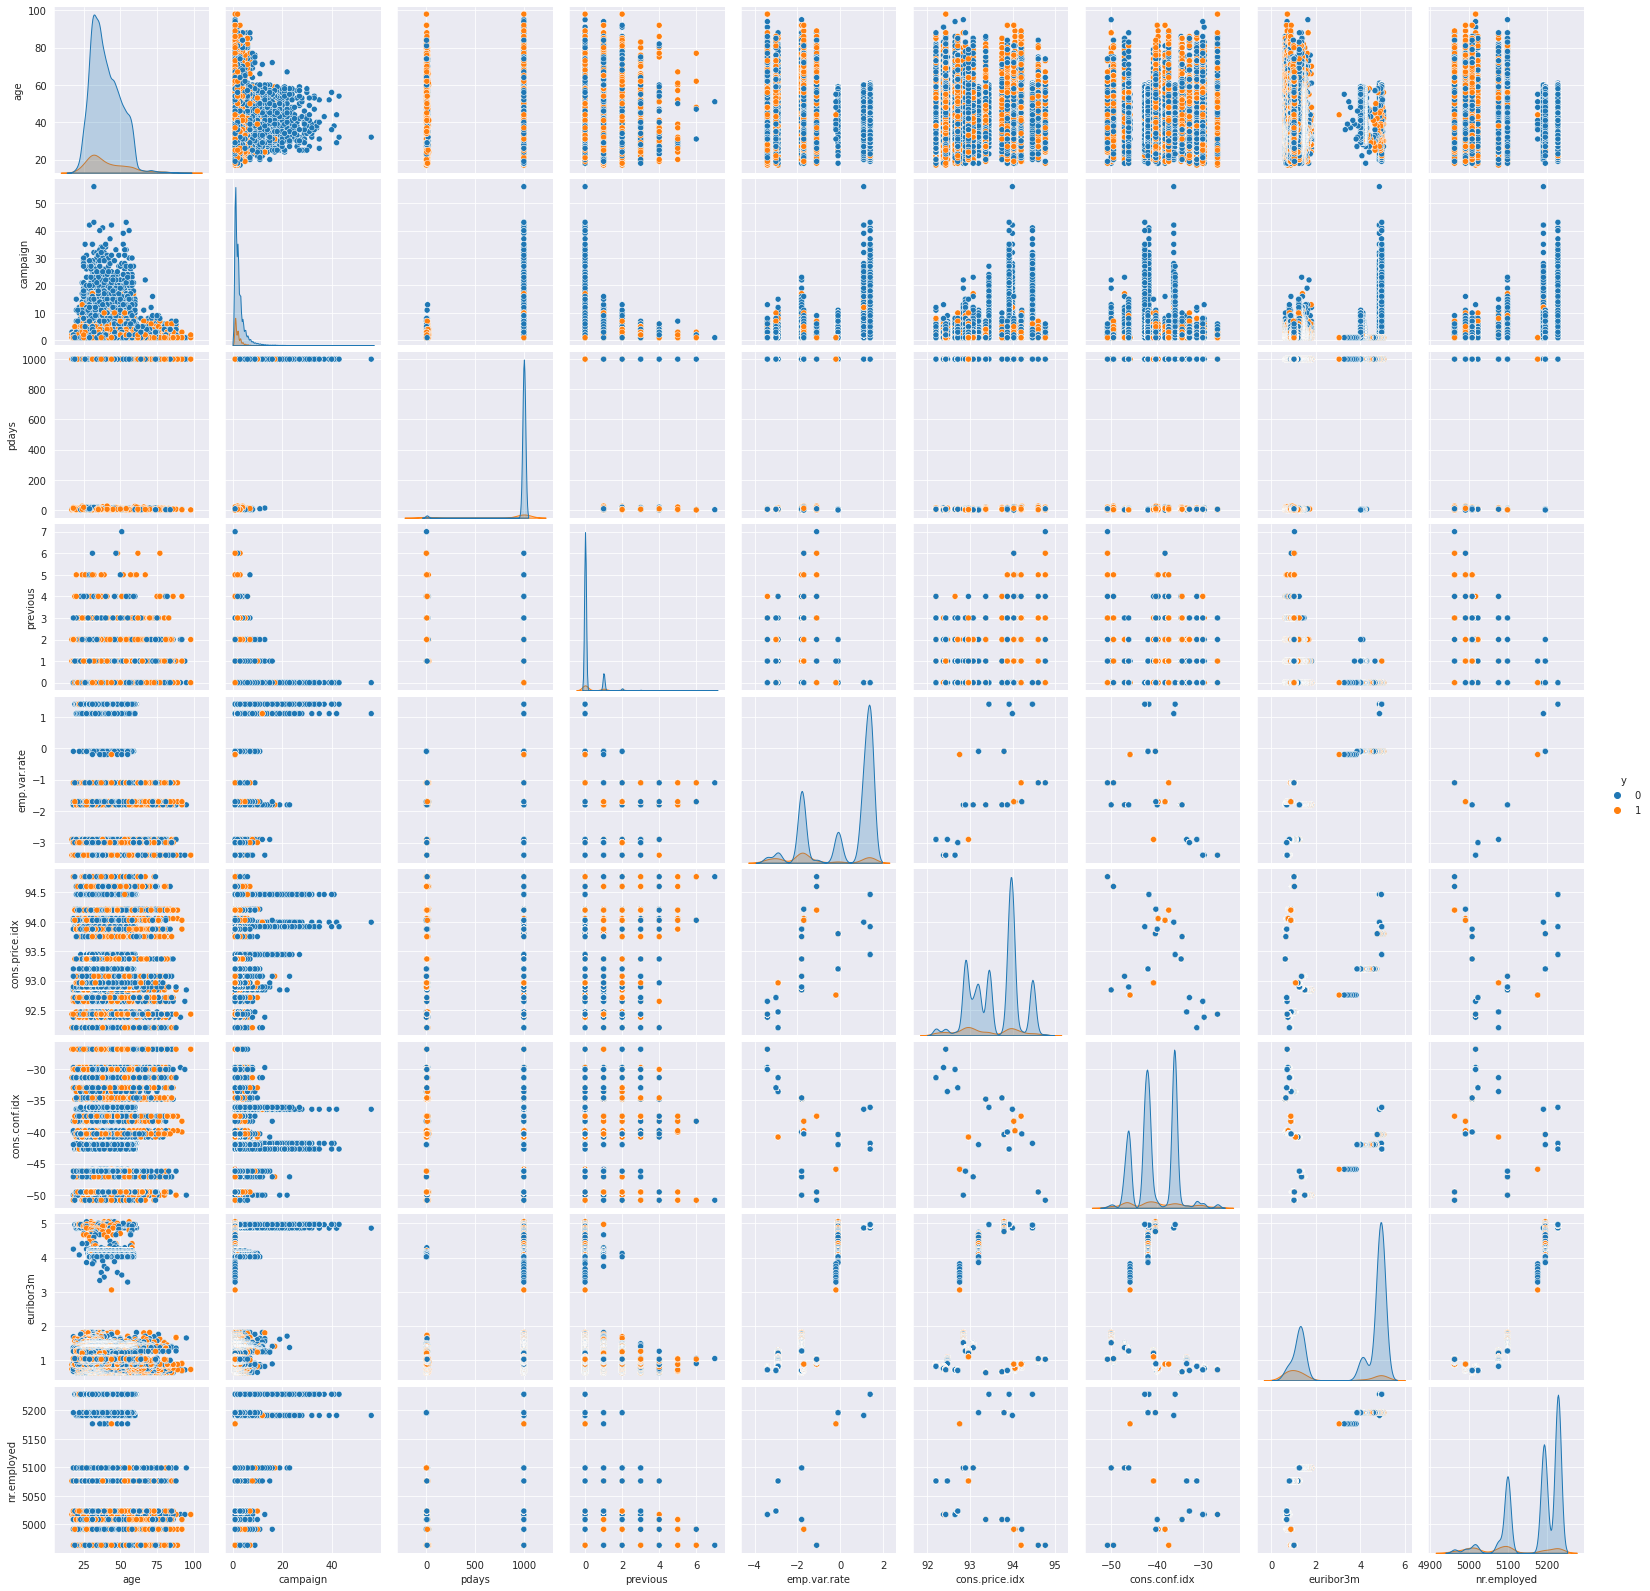

In [77]:
sns.pairplot(numerical_df, hue='y')

In [78]:
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,261,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,149,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,226,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,151,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,307,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [79]:
# Splitting our data
# ---
# 
y=banking['y'].values
features=['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']
X=data[features].values


TypeError: ignored

## <font color="green">Challenge 3</font>

In [ ]:
# Challenge 3
# ---
# Question: Predict if a person will have diabetes or not using the KNN algorithm.
# ---
# Dataset url = http://bit.ly/DatasetDiabetes
# ---
# 
OUR CODE GOES HERE

## <font color="green">Challenge 4</font>

In [ ]:
# Challenge 4
# ---
# Question: Predict the miles per gallon (mpg) of a car, given its displacement and horsepower.
# ---
# Dataset Train url = http://bit.ly/AutoMPGTrainDataset
# Dataset Test url = http://bit.ly/AutoMPGTestDataset 
# ---
# 
OUR CODE GOES HERE

## <font color="green">Challenge 5</font>

In [ ]:
# Challenge 6
# ---
# Question: Predict the target class given the following dataset.
# ---
# Dataset url = http://bit.ly/ClassifiedDataset
# ---
# 
OUR CODE GOES HERE